In [71]:
"""leverage the IMDb Movie Dataset to extract valuable insights and drive decision-making in
the movie industry. Our focus is on improving content recommendation,
analyzing movie performance, and conducting trend analysis and forecasting."""

'leverage the IMDb Movie Dataset to extract valuable insights and drive decision-making in\nthe movie industry. Our focus is on improving content recommendation,\nanalyzing movie performance, and conducting trend analysis and forecasting.'

In [72]:
import pandas as pd
movie = pd.read_csv("/home/leong/Desktop/IMDb Movie Dataset/IMDB-Movie-Data.csv")
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [73]:
#no dirt
movie.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [74]:
mean_revenue = movie['Revenue (Millions)'].mean()
mean_Metascore = movie["Metascore"].mean()

movie['Revenue (Millions)'].fillna(mean_revenue, inplace=True)
movie["Metascore"].fillna(mean_Metascore, inplace = True)

In [75]:
movie.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

Exploratory Data Analysis

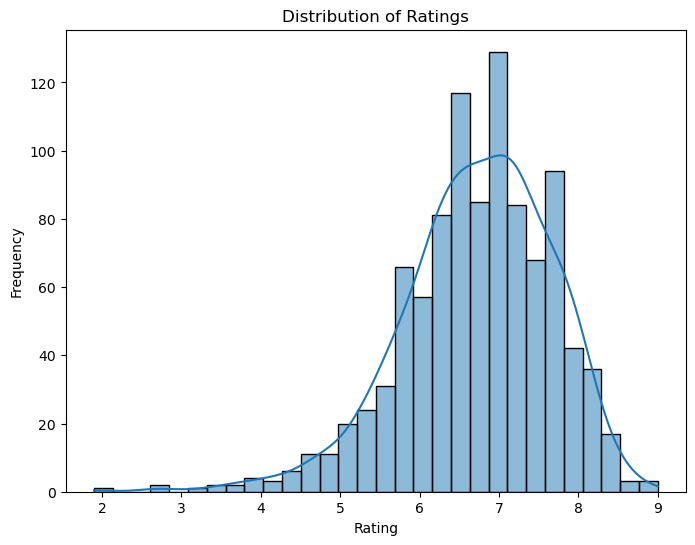

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data=movie, x='Rating', kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()



Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
                           ..
Action,Comedy,Family        1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: Genre, Length: 207, dtype: int64


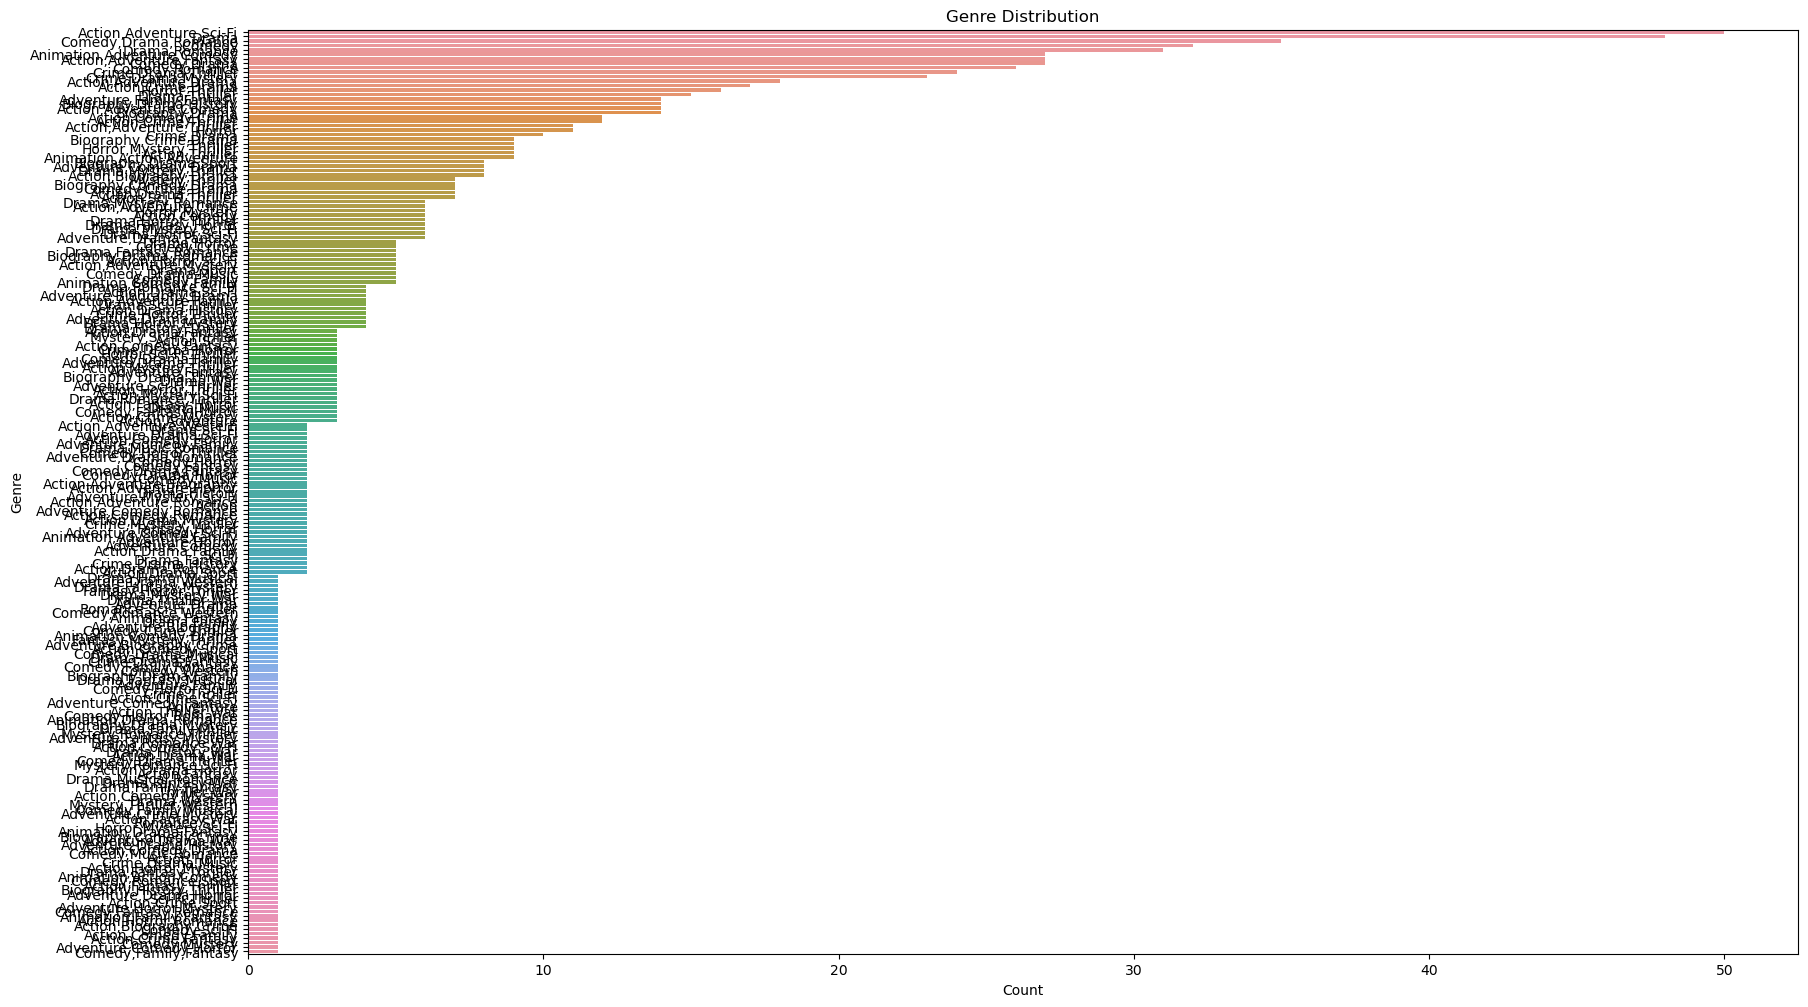

In [77]:
# Analyze Genres
genre_counts = movie['Genre'].value_counts()
print(genre_counts)

plt.figure(figsize=(20, 12))
sns.countplot(data=movie, y='Genre', order=genre_counts.index)
plt.title('Genre Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()



97141     2
291       2
1427      2
757074    1
5796      1
         ..
115       1
271301    1
93764     1
217464    1
12435     1
Name: Votes, Length: 997, dtype: int64


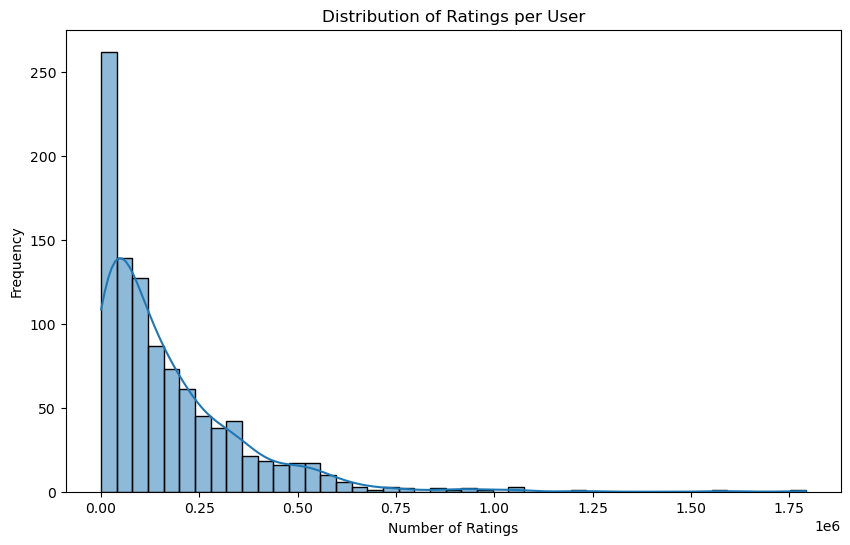

In [78]:
# Analyze user behavior ratings per User
user_ratings_counts = movie['Votes'].value_counts()
print(user_ratings_counts)

plt.figure(figsize=(10, 6))
sns.histplot(data=movie, x='Votes', kde=True)
plt.title('Distribution of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()



The Host                   2
Guardians of the Galaxy    1
The Hurt Locker            1
The Daughter               1
Pineapple Express          1
                          ..
The Fault in Our Stars     1
Blended                    1
Fast & Furious             1
Looper                     1
Nine Lives                 1
Name: Title, Length: 999, dtype: int64


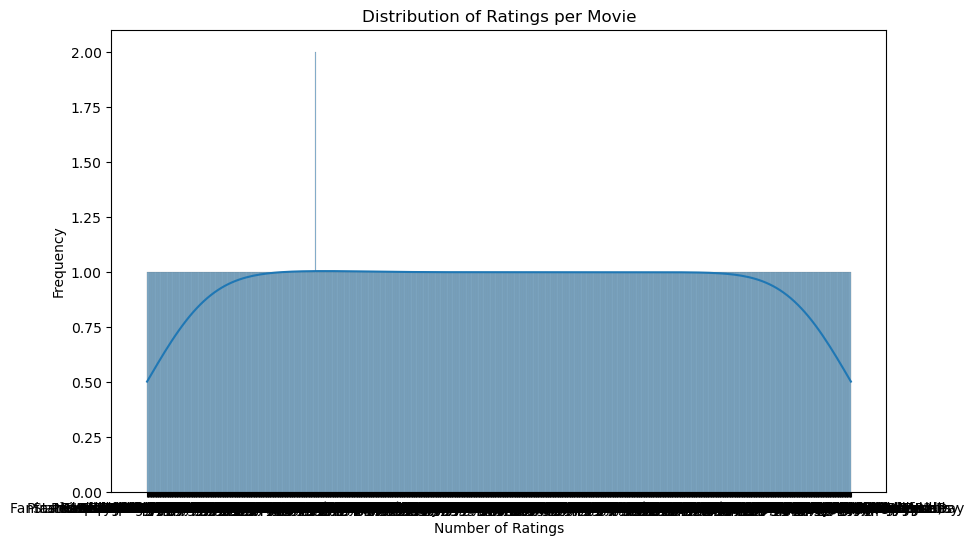

In [79]:
# Analyze user behavior ratings per Movie
movie_ratings_counts = movie['Title'].value_counts()
print(movie_ratings_counts)

plt.figure(figsize=(10, 6))
sns.histplot(data=movie, x='Title', kde=True)
plt.title('Distribution of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()



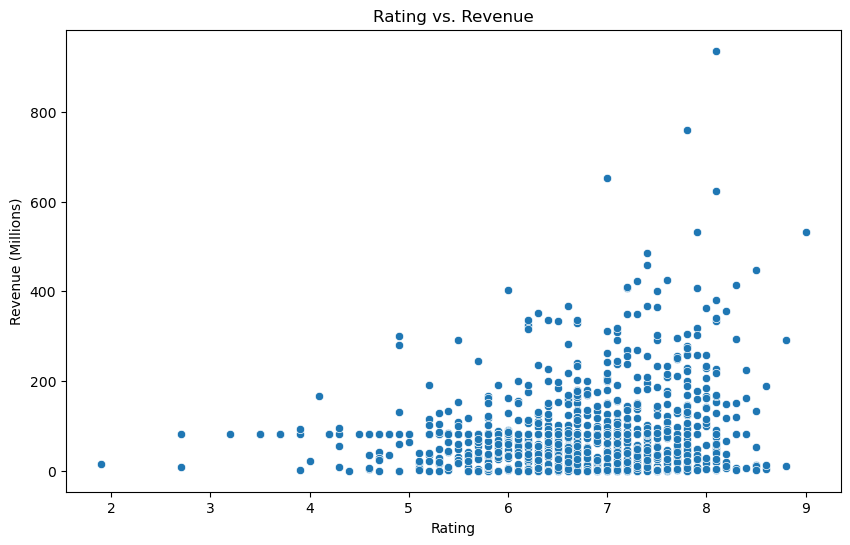

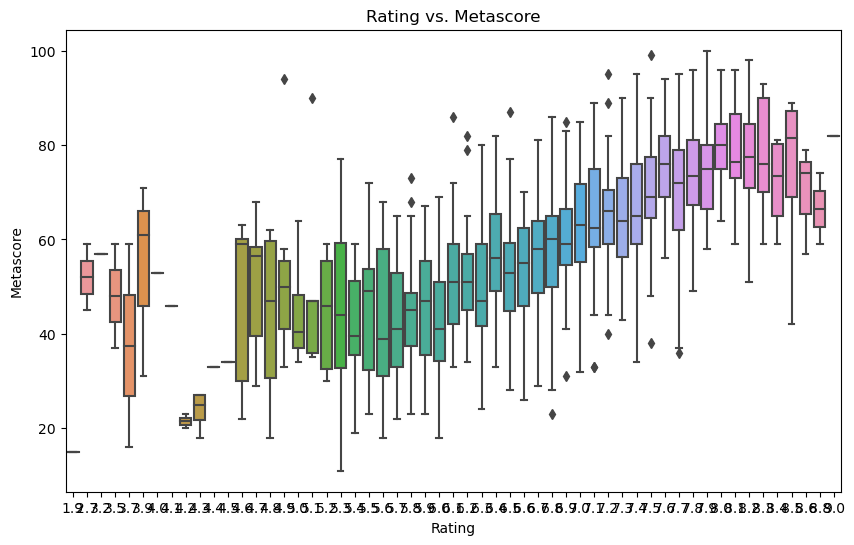

In [80]:
# Visualize the relationships rating against revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movie, x='Rating', y='Revenue (Millions)')
plt.title('Rating vs. Revenue')
plt.xlabel('Rating')
plt.ylabel('Revenue (Millions)')
plt.show()

# Visualize relationships rating against Metascore
plt.figure(figsize=(10, 6))
sns.boxplot(data=movie, x='Rating', y='Metascore')
plt.title('Rating vs. Metascore')
plt.xlabel('Rating')
plt.ylabel('Metascore')
plt.show()

Goal 1: Content Recommendation (Improving Movie Recommendations)

In [81]:
from surprise import Reader, Dataset, SVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel



In [82]:

"""For Hybrid filtering, we make use of both collaborative and content-basd filtering"""

# Assign dummy user IDs
movie['User'] = 0

# Collaborative filtering
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(movie[['User', 'Title', 'Rating']], reader)
trainset = data.build_full_trainset()
algo_cf = SVD()
algo_cf.fit(trainset)



In [83]:
# Content based filtering
tfidf = TfidfVectorizer(stop_words='english')
movie['CombinedFeatures'] = movie['Description'] + ' ' + movie['Director'] + ' ' + movie['Actors']
tfidf_matrix = tfidf.fit_transform(movie['CombinedFeatures'])
cosine_sim_matrix = linear_kernel(tfidf_matrix, tfidf_matrix)



In [84]:
# Hybrid Recommendation
def hybrid_recommendation(title):
    movie_cf_predictions = [algo_cf.predict(0, movie_title).est for movie_title in movie['Title']]
    idx = movie[movie['Title'] == title].index[0]

    sim_scores = list(enumerate(cosine_sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    top_similar_movies = [movie['Title'][i[0]] for i in sim_scores[1:11]]

    # Hybrid Recommendation: Combine CF and CB predictions
    hybrid_predictions = [(cf_pred + cb_pred) / 2 for cf_pred, cb_pred in zip(movie_cf_predictions, sim_scores)]
    
    # Hybrid Recommendation: Sort the movies by the hybrid prediction score
    recommended_movies = [movie['Title'][i[0]] for i in sorted(enumerate(hybrid_predictions), key=lambda x: x[1][0], reverse=True)][:10]
    return recommended_movies
movie_title = "Inception"

recommendations = hybrid_recommendation(movie_title)

print("Top Recommendations for", movie_title)
for movie_title in recommendations:
    print(movie_title)


Top Recommendations for Inception
Nine Lives
Search Party
Step Up 2: The Streets
Hostel: Part II
Secret in Their Eyes
Project X
Resident Evil: Afterlife
Taare Zameen Par
Take Me Home Tonight
Underworld: Rise of the Lycans


In [85]:
#Optimizing using grid search 
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_factors': [50, 100, 200],
              'n_epochs': [10, 20, 30],
              'lr_all': [0.005, 0.01, 0.02],
              'reg_all': [0.02, 0.1, 0.2]}

# Load the dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(movie[['User', 'Title', 'Rating']], reader)

algo = SVD()
gs = GridSearchCV(algo_class=SVD, param_grid=param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

best_params = gs.best_params['rmse']
best_score = gs.best_score['rmse']

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'n_factors': 50, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.1}
Best Score: 0.9450314320070902
